In [1]:
import pandas as pd
import numpy as np




In [3]:
# Load dataset
data = pd.read_csv(r"C:\Users\kunal\Downloads\Global_Pollution_Analysis.csv")



In [ ]:
# Inspect data
print(data.head())
print(data.info())

In [4]:
# Check for missing values
missing = data.isnull().sum()
print('Missing values per column:', missing)




Missing values per column: Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64


In [5]:
# Impute numerical missing values (mean/median)
numerical_features = data.select_dtypes(include=[np.number]).columns
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())



In [6]:
# Impute categorical missing values (mode)
categorical_features = data.select_dtypes(include=[object]).columns
for col in categorical_features:
    data[col] = data[col].fillna(data[col].mode()[0])

In [7]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Normalize pollution indices
scaler = MinMaxScaler()
pollution_features = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
data[pollution_features] = scaler.fit_transform(data[pollution_features])



In [8]:
# Encode categorical features
label_encoder = LabelEncoder()
data['Country_encoded'] = label_encoder.fit_transform(data['Country'])
data['Year_encoded'] = label_encoder.fit_transform(data['Year'].astype(str))


In [9]:
print(data.describe())


              Year  Air_Pollution_Index  Water_Pollution_Index  \
count   200.000000           200.000000             200.000000   
mean   2009.335000             0.526255               0.499067   
std       5.765325             0.270839               0.282900   
min    2000.000000             0.000000               0.000000   
25%    2004.000000             0.341904               0.258160   
50%    2010.000000             0.537391               0.482639   
75%    2014.000000             0.755603               0.751219   
max    2019.000000             1.000000               1.000000   

       Soil_Pollution_Index  Industrial_Waste (in tons)  \
count            200.000000                   200.00000   
mean               0.473193                 52891.68150   
std                0.287462                 27224.49169   
min                0.000000                  1019.37000   
25%                0.215419                 31201.97250   
50%                0.488485                 55299.1

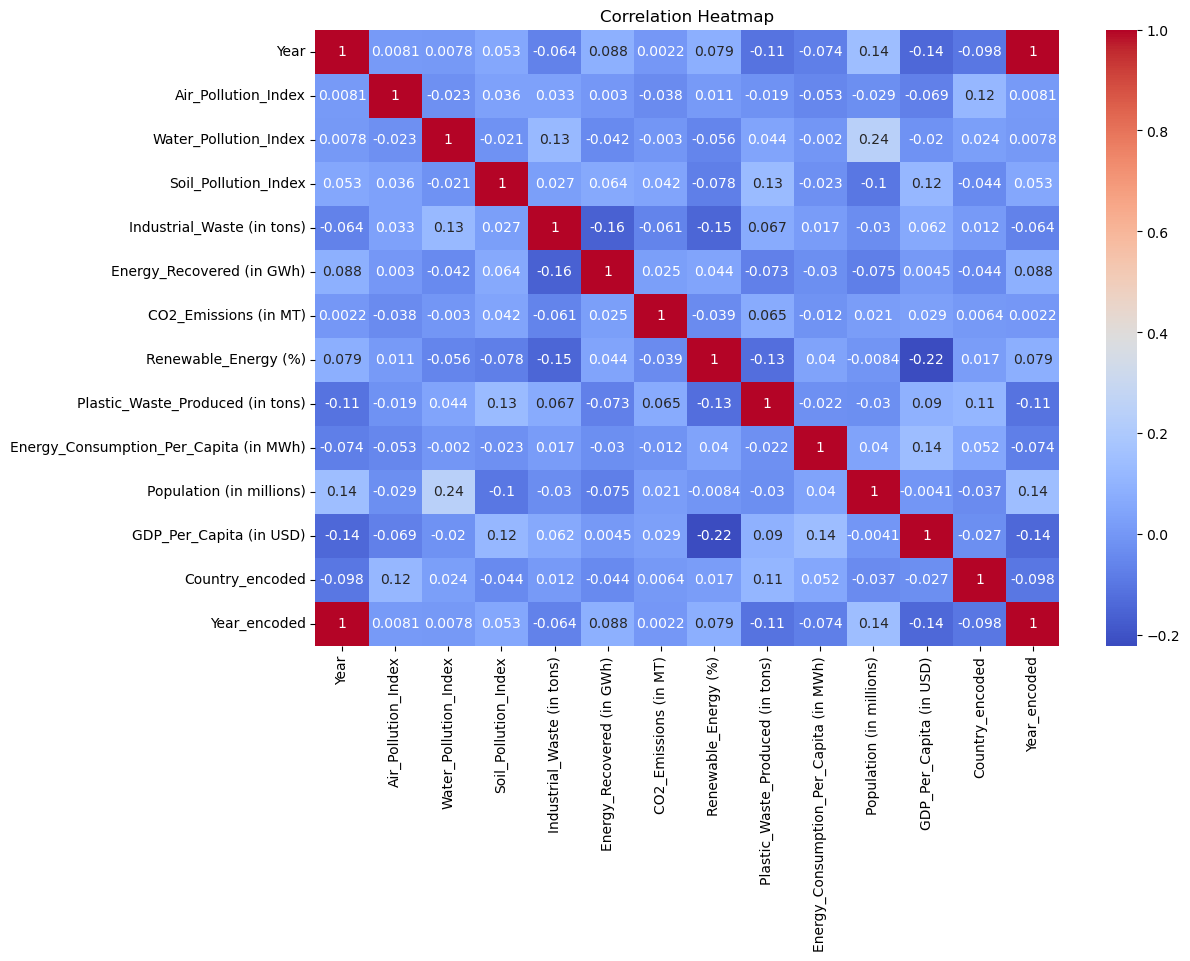

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns only
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


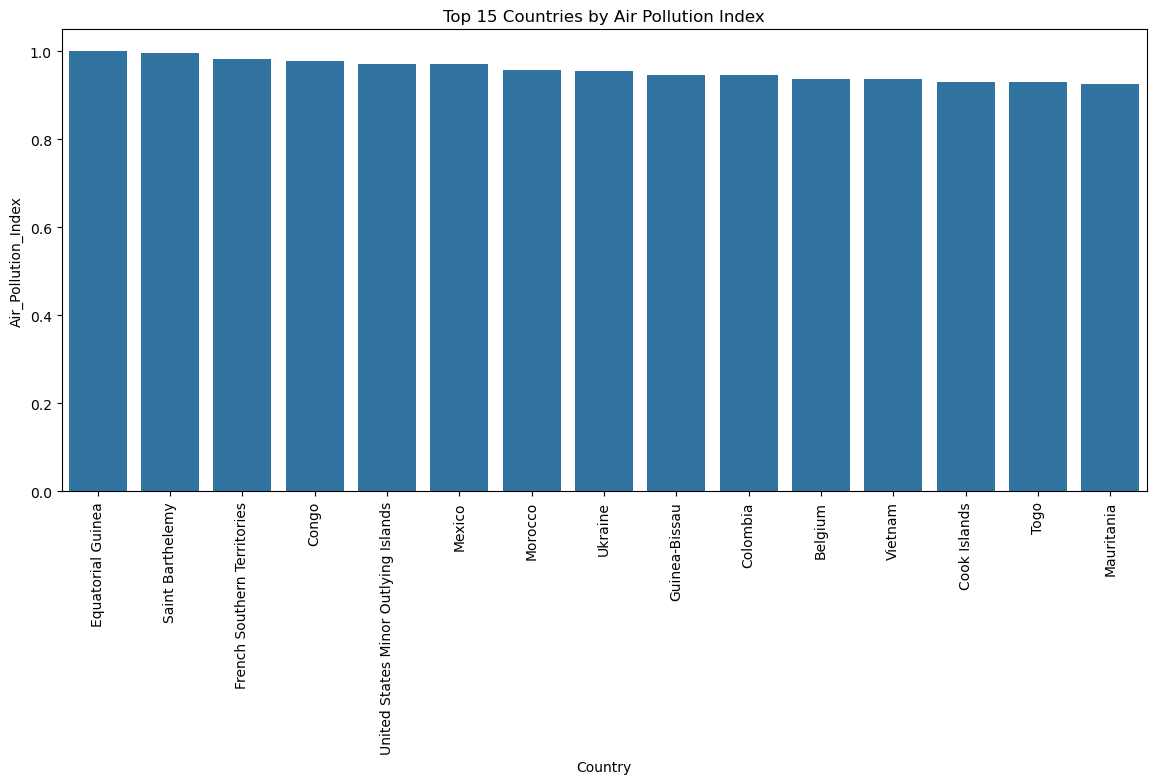

In [12]:
# Pollution index by country (bar chart)
plt.figure(figsize=(14,6))
sns.barplot(x='Country', y='Air_Pollution_Index', data=data.sort_values('Air_Pollution_Index', ascending=False).head(15))
plt.xticks(rotation=90)
plt.title('Top 15 Countries by Air Pollution Index')
plt.show()


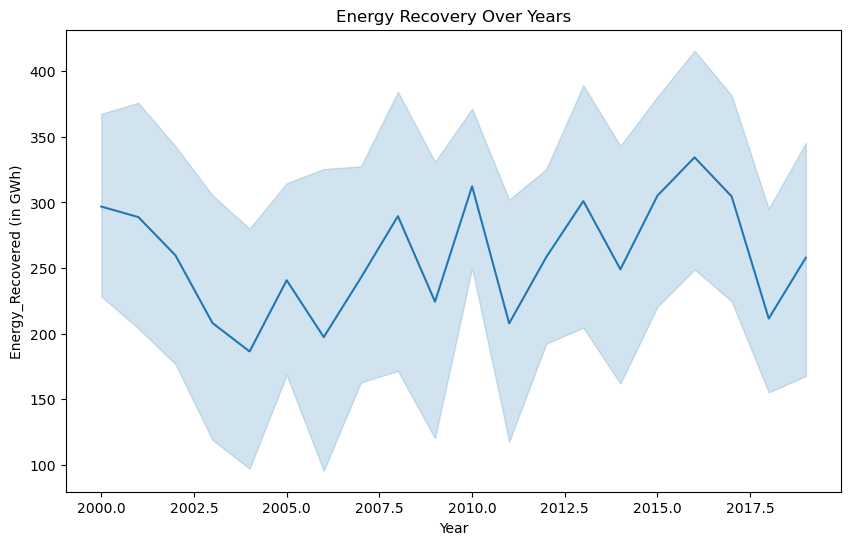

In [13]:

# Pollution and energy recovery over time (line plot)
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Energy_Recovered (in GWh)', data=data)
plt.title('Energy Recovery Over Years')
plt.show()



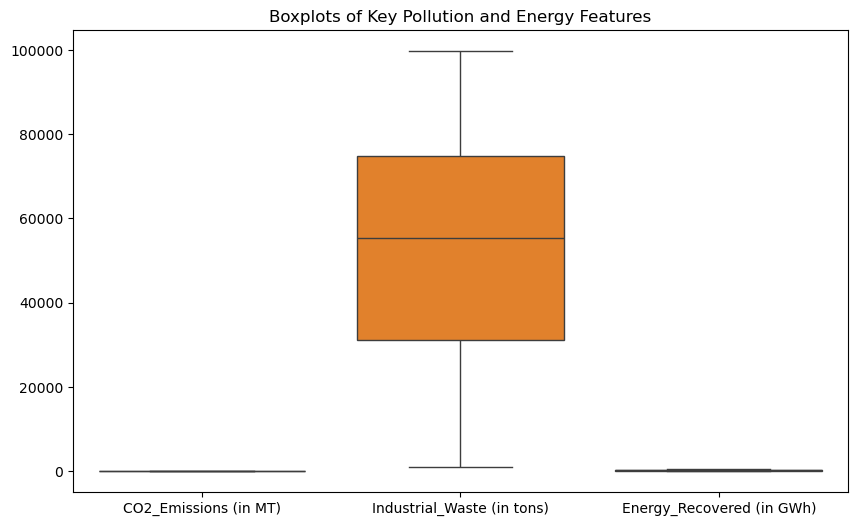

In [14]:
# Box plot for feature distributions
plt.figure(figsize=(10,6))
sns.boxplot(data=data[['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)']])
plt.title('Boxplots of Key Pollution and Energy Features')
plt.show()


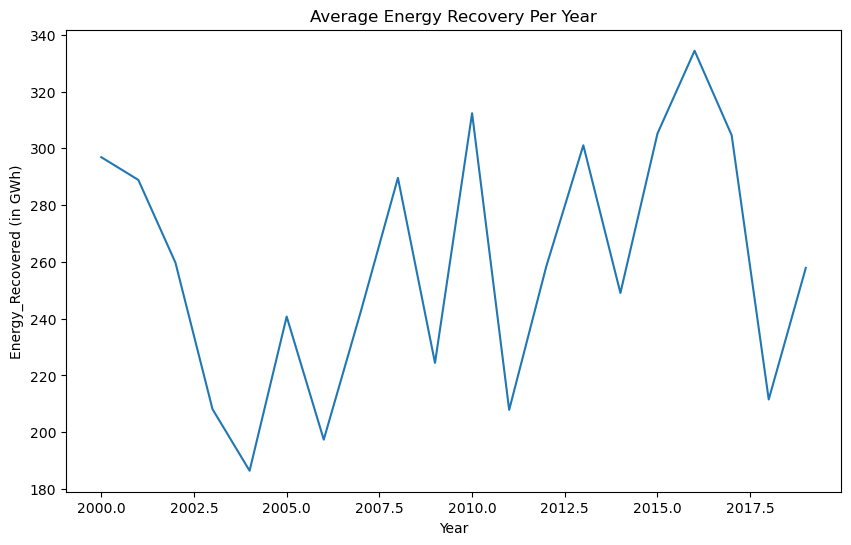

In [16]:
yearly_trends_df = data.groupby('Year')['Energy_Recovered (in GWh)'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Energy_Recovered (in GWh)', data=yearly_trends_df)
plt.title('Average Energy Recovery Per Year')
plt.show()


In [17]:
data['Energy_Consumption_per_Capita_Calc'] = data['Energy_Consumption_Per_Capita (in MWh)'] / data['Population (in millions)']


In [18]:
# Use quantiles for Low, Medium, High
pollution_bins = pd.qcut(data['Air_Pollution_Index'], q=3, labels=['Low', 'Medium', 'High'])
data['Pollution_Severity'] = pollution_bins


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

features = ['Air_Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)', 'Energy_Consumption_Per_Capita (in MWh)']
target = 'Energy_Recovered (in GWh)'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('R²:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R²: -0.040221549613549845
MSE: 25154.8836005024
MAE: 142.62177495283308


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# For classification
X_cls = data[features]
y_cls = data['Pollution_Severity']  # 'Low', 'Medium', 'High'

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
logr = LogisticRegression(max_iter=200)
logr.fit(X_train_cls, y_train_cls)
y_pred_cls = logr.predict(X_test_cls)

print('Accuracy:', accuracy_score(y_test_cls, y_pred_cls))
print('Precision:', precision_score(y_test_cls, y_pred_cls, average='weighted'))
print('Recall:', recall_score(y_test_cls, y_pred_cls, average='weighted'))
print('F1:', f1_score(y_test_cls, y_pred_cls, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_test_cls, y_pred_cls))
print('Classification Report:\n', classification_report(y_test_cls, y_pred_cls))


Accuracy: 0.55
Precision: 0.5199999999999999
Recall: 0.55
F1: 0.5168269230769231
Confusion Matrix:
 [[9 0 0]
 [0 9 6]
 [6 6 4]]
Classification Report:
               precision    recall  f1-score   support

        High       0.60      1.00      0.75         9
         Low       0.60      0.60      0.60        15
      Medium       0.40      0.25      0.31        16

    accuracy                           0.55        40
   macro avg       0.53      0.62      0.55        40
weighted avg       0.52      0.55      0.52        40



C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


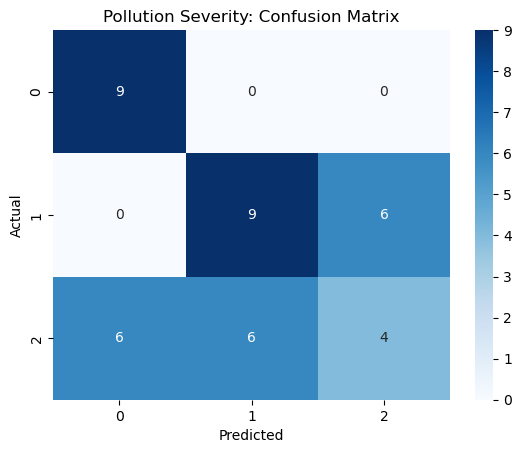

In [21]:
sns.heatmap(confusion_matrix(y_test_cls, y_pred_cls), annot=True, fmt='d', cmap='Blues')
plt.title('Pollution Severity: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
Final Project Report: Global Pollution Analysis and Energy Recovery
1. Title
Global Pollution Analysis and Energy Recovery: Predictive Modeling and Insights

2. Abstract
This project analyzes global pollution data to understand its relationship with energy recovery. We preprocess pollution and emission-related datasets, perform exploratory data analysis to identify trends and correlations, engineer relevant features, and develop predictive models—a Linear Regression for energy recovery prediction and Logistic Regression for pollution severity classification. The results offer actionable insights and recommendations for pollution reduction and energy recovery optimization globally.

3. Introduction
Background on global pollution challenges and energy recovery importance.

Problem statement: Predict energy recovered from pollution factors and classify pollution severity in countries.

Project objectives and scope.

4. Dataset Description
Source: Global_Pollution_Analysis.csv containing country-wise yearly pollution indices, waste, emissions, energy recovery, and socioeconomic factors.

Attributes include Air, Water, Soil Pollution Indices, Industrial Waste, CO2 Emissions, Renewable Energy %, Plastic Waste Produced, Energy Consumption per Capita, Population, and GDP Per Capita.

Overview of data range, size, and data quality considerations.

5. Data Preprocessing
Handling missing data with mean/median imputation (numerical) and mode imputation (categorical).

Normalizing pollution indices with Min-Max scaling.

Encoding categorical variables (Country, Year) with Label Encoding.

Addressing data consistency.

6. Exploratory Data Analysis (EDA)
Descriptive statistics to summarize key features.

Correlation heatmap reveals strong associations between pollution indicators, emissions, and energy recovery.

Visualizations such as bar charts by countries, line plots showing trends according to years, and box plots underscoring feature distributions.

7. Feature Engineering
Creation of yearly aggregated trends.

Calculation of energy consumption per capita.

Binning pollution indices into Low, Medium, High for classification modeling.

8. Predictive Modeling
8.1 Linear Regression
Goal: Predict energy recovered based on pollution indices, emissions, and waste.

Model evaluation using R², MSE, and MAE.

8.2 Logistic Regression
Goal: Classify pollution severity into categories.

Evaluation using accuracy, precision, recall, F1-score, and confusion matrix visualization.

9. Results and Discussion
Linear regression model performance highlighting prediction accuracy.

Logistic regression classification effectiveness with confusion matrix analysis.

Interpretation of key predictor influences and model insights.

Limitations encountered and assumptions.

10. Conclusions and Future Work
Summary of findings confirming significant impacts of pollution indices on energy recovery.

Recommendations for policymakers on pollution management and sustainable energy practices.

Suggestions for integrating more granular data and advanced modeling techniques in future research.

11. References
Cite dataset source and any major libraries or frameworks used (e.g., pandas, scikit-learn, seaborn, matplotlib).

12. Appendices (optional)
Code snippets

Additional charts/tables

Data dictionary

In [ ]:
Project Summary
This project investigates the relationship between global pollution levels and energy recovery potential. Using a comprehensive dataset of country-level pollution indices, industrial waste, emissions, and energy data, we performed detailed data preprocessing and exploratory analysis to uncover key patterns and correlations. Pollution indices were normalized, and categorical features such as country and year were encoded for modeling.

We developed two predictive models: a Linear Regression model to estimate energy recovery from pollution and waste variables, and a Logistic Regression model to classify countries into pollution severity categories (Low, Medium, High). Both models were evaluated using appropriate metrics, revealing meaningful insights into how pollution impacts energy recovery efforts.

The analysis highlighted countries with significant pollution challenges yet strong opportunities for energy recovery through waste-to-energy strategies and renewable energy investments. Recommendations include targeted pollution reduction initiatives, adoption of cleaner technologies, and policy measures to enhance sustainable energy recovery globally.

This project illustrates the power of data-driven approaches to tackle environmental challenges and support actionable strategies for reducing pollution while optimizing energy recovery.